In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Problema 1
Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede
 utilizar el enfoque que prefiera.

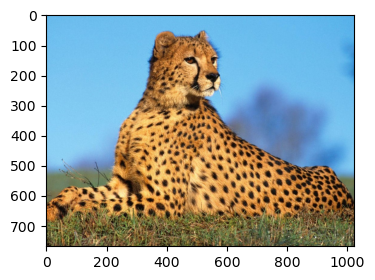

In [4]:
# Imagen que se usará para el problema 1
img_p1 = cv2.imread("Problema1/guepardo.jpg")
img_p1 = cv2.cvtColor(img_p1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,3))
plt.imshow(img_p1)
plt.show()

In [5]:
def AvGrayScale(img):
    # dimensiones de la imagen
    alto = img.shape[0]
    ancho = img.shape[1]
    # lienzos en blanco
    gris_pond=np.zeros((alto, ancho, 1))
    # se calcula el gris ponderado
    img_gris = img*[0.3, 0.59, 0.11]
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img_gris[i, j]
            gris_pond[i, j] = pixel.sum()
    return gris_pond

In [6]:
def binarize_img(img, umbral=0.5):
    umbral = umbral if umbral <= 1 else 1
    umbral = umbral if umbral >= 0 else 0.1
    img_gray = AvGrayScale(img)/255
    img_gray[img_gray < umbral] = 0
    img_gray[~(img_gray < umbral)] = 1
    return img_gray

In [7]:
bin_img=binarize_img(img_p1, 0.4)
plt.figure(figsize=(5,3))
plt.imshow(bin_img, cmap='gray')
plt.show()

KeyboardInterrupt: 

## Problema 2
Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR, XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [ ]:
# Imagen1 que se usará para el problema 2
img1_p2 = cv2.imread("Problema2/leon.jpg")
img1_p2 = cv2.cvtColor(img1_p2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,3))
plt.imshow(img1_p2)
plt.show()

In [ ]:
# Imagen2 que se usará para el problema 2
img2_p2 = cv2.imread("Problema2/sol.jpg")
img2_p2 = cv2.cvtColor(img2_p2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,3))
plt.imshow(img2_p2)
plt.show()

In [ ]:
def imgOperations(img1, img2, umbral_img1=0.5, umbral_img2=0.5):
    # SUMA
    img_sum = (img1*0.5).astype('int') + (img2*0.5).astype('int')
    # RESTA
    img_resta = img1.astype('int') - img2.astype('int')
    img_resta[img_resta < 0] = 0
    # Binarización
    img1_bin = binarize_img(img1, umbral_img1)
    img1_bin_neg = (~img1_bin.astype('bool')).astype('int')
    img2_bin = binarize_img(img2, umbral_img2)
    img2_bin_neg = (~img2_bin.astype('bool')).astype('int')
    # AND
    img_and = img1_bin * img2_bin
    # OR
    img_or = img1_bin + img2_bin
    img_or[img_or > 1] = 1
    # XOR
    img_xor = img1_bin + img2_bin
    img_xor[img_xor > 1] = 0
    
    return img_sum, img_resta, img1_bin, img2_bin, img1_bin_neg, img2_bin_neg, img_and, img_or, img_xor

In [ ]:
img_sum, img_resta, img1_bin, img2_bin, img1_bin_neg, img2_bin_neg, img_and, img_or, img_xor = imgOperations(img2_p2, img1_p2)

In [ ]:
print("SUMA")
plt.figure(figsize=(5,3))
plt.imshow(img_sum)
plt.show()

In [ ]:
print("RESTA")
plt.figure(figsize=(5,3))
plt.imshow(img_resta)
plt.show()

In [ ]:
print("AND")
plt.figure(figsize=(5,3))
plt.imshow(img_and, cmap='gray')
plt.show()

In [ ]:
print("OR")
plt.figure(figsize=(5,3))
plt.imshow(img_or, cmap='gray')
plt.show()

In [ ]:
print("XOR")
plt.figure(figsize=(5,3))
plt.imshow(img_xor, cmap='gray')
plt.show()

In [ ]:
# Imagen1 que se usará para el problema 2
img3_p2 = cv2.imread("Problema2/avion.jpg")
img3_p2 = cv2.cvtColor(img3_p2, cv2.COLOR_BGR2RGB)
# Imagen1 que se usará para el problema 2
img4_p2 = cv2.imread("Problema2/cielo.jpg")
img4_p2 = cv2.cvtColor(img4_p2, cv2.COLOR_BGR2RGB)

In [ ]:
img_sum, img_resta, img1_bin, img2_bin, img1_bin_neg, img2_bin_neg, img_and, img_or, img_xor = imgOperations(img3_p2, img4_p2)

In [ ]:
print("SUMA")
plt.figure(figsize=(5,3))
plt.imshow(img_sum)
plt.show()

In [ ]:
print("RESTA")
plt.figure(figsize=(5,3))
plt.imshow(img_resta)
plt.show()

In [ ]:
print("AND")
plt.figure(figsize=(5,3))
plt.imshow(img_and, cmap='gray')
plt.show()

In [ ]:
print("OR")
plt.figure(figsize=(5,3))
plt.imshow(img_or, cmap='gray')
plt.show()

In [ ]:
print("XOR")
plt.figure(figsize=(5,3))
plt.imshow(img_xor, cmap='gray')
plt.show()